In [3]:
import pandas as pd
import numpy
import matplotlib

import seaborn
import  plotly
import  scipy
import  statsmodels

#returns all the rows and columns for the dataframe

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Dataset Description:
The Public School Characteristics 2020-2021 dataset is provided by the National Center for Education Statistics. This dataset provides information on schools across the U.S and icnludes data on school identifiers, location details, enrollment information, grade leves, Title 1 funding status, and school types such as charter or magnent schools. This dataset also includes information surrounding student demopgraphics, and classifes schools based on their geographic location such as urban, suburban, town, or rual. 

### Link to Dataset: https://catalog.data.gov/dataset/public-school-characteristics-2020-21-6120a




Title: School Neighborhood Poverty Estimates, 2020-21

### Link:https://catalog.data.gov/dataset/school-neighborhood-poverty-estimates-2020-21

### Description: 

The 2020-2021 School Neighborhood Poverty Estimates are based on school locations from the 2020-2021 Common Core of Data (CCD) school file and income data from families with children ages 5 to 17 in the U.S. Census Bureau’s 2017-2021 American Community Survey (ACS) 5-year collection. The ACS is a continuous household survey that collects social, demographic, economic, and housing information from the population in the United States each month. The Census Bureau calculates the income-to-poverty ratio (IPR) based on money income reported for families relative to the poverty thresholds, which are determined based on the family size and structure. Noncash benefits (such as food stamps and housing subsidies) are excluded, as are capital gains and losses. The IPR is the percentage of family income that is above or below the federal poverty level. The IPR indicator ranges from 0 to a top-coded value of 999. A family with income at the poverty threshold has an IPR value of 100. The estimates in this file reflect the IPR for the neighborhoods around schools which may be different from the neighborhood conditions of students enrolled in schools.All information contained in this file is in the public domain. Data users are advised to review NCES program documentation and feature class metadata to understand the limitations and appropriate use of these data.

### Technical Documentation: https://nces.ed.gov/programs/edge/docs/EDGE_SIDE_PUBSCH_FILEDOC.pdf

# Research Topic:


Education funding and resource allocation may be influenced by disparities in student experiences across different school enviorments. This research explores how factors such as poverty levels, and racial demographics influence the level of which a district is supported and subsized by federal funds.

# Research Problem

Federal funding plays a significant role in addressing disparities in education, particularly for marginalized communities. This research aims to analyze how the allocation of federal funding, particularly Title I funding, correlates with socio-economic disparities, such as racial composition and poverty levels, in school districts. By focusing on the data available—such as Title I revenue, free and reduced-price lunch participation, and student demographics—this research will identify patterns–if any– in funding allocation and how these may relate to disparities across different communities.

This study is especially relevent in light of recent political and policy debates surrounding educational equity, school funding cuts, and the rollback of affirmative action programs.As public schools navigate this increase in economic pressures and the shifting of federal priorities,it isparamount to understand whether schools that serve Black and Hispanic communities are being equitably supported—or further marginalized.

# Reading My Data:

In [4]:
file_path = "/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Public School Charachtertics/merg_data.csv"

df = pd.read_csv(file_path)  # Load CSV

In [5]:
df.head()

,X_x,Y_x,OBJECTID_x,NCESSCH,NAME,IPR_EST,IPR_SE,SCHOOLYEAR,LAT,LON,X_y,Y_y,OBJECTID_y,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,LSTREET1,LSTREET2,LCITY,LSTATE,LZIP,LZIP4,PHONE,CHARTER_TEXT,MAGNET_TEXT,VIRTUAL,GSLO,GSHI,SCHOOL_LEVEL,TITLEI,STITLEI,STATUS,SCHOOL_TYPE_TEXT,SY_STATUS_TEXT,ULOCALE,NMCNTY,TOTFRL,FRELCH,REDLCH,PK,KG,G01,G02,G03,G04,G05,G06,G07,G08,G09,G10,G11,G12,G13,UG,AE,TOTMENROL,TOTFENROL,TOTAL,MEMBER,FTE,STUTERATIO,AMALM,AMALF,AM,ASALM,ASALF,AS,BLALM,BLALF,BL,HPALM,HPALF,HP,HIALM,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
0,-86.206205,34.260206,1,10000500870,Albertville Middle School,259,87,2020-2021,34.2602,-86.206200,-86.206200,34.2602,1,2020-2021,AL,100005,AL-101,Albertville City,Albertville Middle School,600 E Alabama Ave,NaN,Albertville,AL,35950,,(256)878-2341,No,No,Not Virtual,07,08,Middle,1-Yes,1-Yes,1,Regular school,Currently operational,32-Town: Distant,Marshall County,332.0,332.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469.0,439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,908.0,908.0,42.0,21.62,1.0,1.0,2.0,0.0,4.0,4.0,18.0,15.0,33.0,0.0,0.0,0.0,239.0,230.0,469.0,19.0,10.0,29.0,187.0,184.0,371.0,34.2602,-86.206200
1,-86.204905,34.262206,2,10000500871,Albertville High School,261,92,2020-2021,34.2622,-86.204900,-86.204900,34.2622,2,2020-2021,AL,100005,AL-101,Albertville City,Albertville High School,402 E McCord Ave,NaN,Albertville,AL,35950,2322,(256)894-5000,No,No,Not Virtual,09,12,High,1-Yes,1-Yes,1,Regular school,Currently operational,32-Town: Distant,Marshall County,456.0,456.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,421.0,427.0,384.0,374.0,NaN,NaN,NaN,NaN,NaN,1606.0,1606.0,82.0,19.59,1.0,0.0,1.0,4.0,2.0,6.0,33.0,37.0,70.0,0.0,0.0,0.0,414.0,371.0,785.0,17.0,21.0,38.0,368.0,338.0,706.0,34.2622,-86.204900
2,-86.220105,34.273306,3,10000500879,Albertville Intermediate School,139,61,2020-2021,34.2733,-86.220100,-86.220100,34.2733,3,2020-2021,AL,100005,AL-101,Albertville City,Albertville Intermediate School,901 W McKinney Ave,NaN,Albertville,AL,35950,1300,(256)878-7698,No,No,Not Virtual,05,06,Middle,1-Yes,1-Yes,1,Regular school,Currently operational,32-Town: Distant,Marshall County,330.0,330.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,439.0,452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,891.0,891.0,41.0,21.73,3.0,1.0,4.0,4.0,3.0,7.0,12.0,12.0,24.0,0.0,1.0,1.0,228.0,253.0,481.0,17.0,12.0,29.0,177.0,168.0,345.0,34.2733,-86.220100
3,-86.221811,34.252706,4,10000500889,Albertville Elementary School,227,110,2020-2021,34.2527,-86.221806,-86.221806,34.2527,4,2020-2021,AL,100005,AL-101,Albertville City,Albertville Elementary School,145 West End Drive,NaN,Albertville,AL,35950,,(256)894-4822,No,No,Not Virtual,03,04,Elementary,1-Yes,1-Yes,1,Regular school,Currently operational,32-Town: Distant,Marshall County,397.0,397.0,0.0,NaN,NaN,NaN,NaN,435.0,473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,908.0,908.0,49.0,18.53,2.0,2.0,4.0,4.0,0.0,4.0,22.0,26.0,48.0,0.0,0.0,0.0,260.0,237.0,497.0,7.0,8.0,15.0,180.0,160.0,340.0,34.2527,-86.221806
4,-86.193305,34.289806,5,10000501616,Albertville Kindergarten and PreK,373,124,2020-2021,34.2898,-86.193300,-86.193300,34.2898,5,2020-2021,AL,100005,AL-101,Albertville City,Albertville Kindergarten and PreK,257 Country Club Rd,NaN,Albertville,AL,35951,3927,(256)878-7922,No,No,Not Virtual,PK,KG,Elementary,1-Yes,1-Yes,1,Regular school,Currently operational,32-Town: Distant,Marshall County,181.0,181.0,0.0,113.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556.0,556.0,30.0,18.53,3.0,1.0,4.0,2.0,0.0,2.0,16.0,17.0,33.0,0.0,0.0,0.0,151.0,137.0,288.0,6.0,7.0,13.0,108.0,108.0,216.0,34.2898,-86.193300


I realized that I need to aggregate my data based off of the district in order to merge it with the fiscal data

In [6]:
# Load the dataset
file_path = "/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Public School Charachtertics/merg_data.csv"
df = pd.read_csv(file_path) 

# Standardize the TITLEI values (Yes/No) if needed
def standardize_titlei(x):
    if isinstance(x, str) and ('yes' in x.lower()):
        return 'Yes'
    elif isinstance(x, str) and ('no' in x.lower()):
        return 'No'
    return x

# Apply the function to standardize the TITLEI column
df['TITLEI_standardized'] = df['TITLEI'].apply(standardize_titlei)

# Aggregating data by district (LEAID) and getting only the inforamtion I need
pub_char = df.groupby('LEAID').agg(
    total_poverty_estimate=('IPR_EST', 'mean'),
    school_count=('NAME', 'count'),
    total_title_1_yes=('TITLEI_standardized', lambda x: (x == 'Yes').sum()),
    total_title_1_no=('TITLEI_standardized', lambda x: (x == 'No').sum()),
    total_students_frl=('TOTFRL', 'sum'),
    total_free_reduced_lunch=('FRELCH', 'sum'),
).reset_index()

# Display the head of the aggregated data
pub_char.head()


,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch
0,100005,247.166667,6,6,0,2118.0,2118.0
1,100006,253.333333,15,12,3,2888.0,2613.0
2,100007,481.888889,18,6,12,3277.0,2633.0
3,100008,457.181818,11,4,7,1270.0,1121.0
4,100009,175.800000,5,0,5,0.0,0.0


Adding the fiscal data 

In [7]:

fiscal_data_path = "/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Public School Charachtertics/2020-2021_Fiscal_Data.csv"
# Read the file, specifying encoding and replacing problematic characters
fiscal_data = pd.read_csv(fiscal_data_path, encoding='ISO-8859-1', on_bad_lines='skip')

# Replace the '†' symbol with an empty string or another character
fiscal_data = fiscal_data.replace('†', '', regex=True)

In [8]:
fiscal_data.head()

,Agency Name,State Name [District] Latest available year,Fall Membership (V33) [District Finance] 2019-20,Total Revenue (TOTALREV) [District Finance] 2019-20,Total Revenue - Local Sources (TLOCREV) [District Finance] 2019-20,Total Revenue - State Sources (TSTREV) [District Finance] 2019-20,Total Revenue - Federal Sources (TFEDREV) [District Finance] 2019-20,Total Current Expenditures - El-Sec Education (TCURELSC) [District Finance] 2019-20,Total Expenditures (TOTALEXP) [District Finance] 2019-20,Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2019-20,Total Revenue - Local Sources (TLOCREV) per Pupil (V33) [District Finance] 2019-20,Total Revenue - State Sources (TSTREV) per Pupil (V33) [District Finance] 2019-20,Total Revenue - Federal Sources (TFEDREV) per Pupil (V33) [District Finance] 2019-20,Agency ID - NCES Assigned [District] Latest available year,Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2019-20,CSA ID [District] 2019-20,"Total Students, All Grades (Excludes AE) [District] 2019-20",American Indian/Alaska Native Students [District] 2019-20,Asian or Asian/Pacific Islander Students [District] 2019-20,Hispanic Students [District] 2019-20,Black or African American Students [District] 2019-20,White Students [District] 2019-20,Nat. Hawaiian or Other Pacific Isl. Students [District] 2019-20,Two or More Races Students [District] 2019-20,Total Race/Ethnicity [District] 2019-20,Full-Time Equivalent (FTE) Teachers [District] 2019-20,Pupil/Teacher Ratio [District] 2019-20,Total Staff [District] 2019-20,Total Current Expenditures - Salary (Z32) [District Finance] 2019-20,Total Current Expenditures - Salary (Z32) per Pupil (V33) [District Finance] 2019-20,Total Current Expenditures - Instruction (TCURINST) per Pupil (V33) [District Finance] 2019-20,Total Current Expenditures - Benefits (Z34) per Pupil (V33) [District Finance] 2019-20,Long Term Debt - Issued During FY (_21F) [District Finance] 2019-20,Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2019-20,Instruction Expenditures - Total (E13) [District Finance] 2019-20,Salary - Instruction Expenditures (Z33) [District Finance] 2019-20
0,21ST CENTURY CHARTER SCH OF GARY,Indiana,1190,15027000,215000,10768000,4044000,11961000,13306000,12628,181,9049,3398,1800046.0,13160000,294,1190,1,0,42,1117,2,0,28,1190,47.01,25.31,149.51,5598000,4704,4977,1156,0,1562000,5923000,4120000
1,21ST CENTURY CYBER CS,Pennsylvania,1270,20790000,20566000,56000,168000,18551000,21385000,16370,16194,44,132,4200091.0,3230000,428,1270,4,17,103,135,920,0,91,1270,64.99,19.54,131,8670000,6827,7552,3928,816000,0,9591000,4907000
2,21ST CENTURY PUBLIC ACADEMY,NEW MEXICO,,,,,,,,,,,,3500187.0,,,,,,,,,,,,,,,,,,,,,,
3,A CENTER FOR CREATIVE EDUCATION (79457),Arizona,67,591000,38000,548000,5000,617000,617000,8821,567,8179,75,400328.0,0,,67,1,0,20,2,40,0,4,67,0,,Ð,359000,5358,4881,463,0,0,327000,284000
4,A E R O SPEC EDUC COOP,Illinois,Ð,35655000,23202000,6562000,5891000,28913000,32806000,Ð,Ð,Ð,Ð,1700024.0,0,176,213,0,0,64,35,109,0,5,213,69.1,3.08,197.71,15358000,Ð,Ð,Ð,0,0,14478000,8555000


In [9]:
#renaming the fiscal data bc the headers are way too long
fiscal_data_renamed = {
    'Agency Name': 'agency_name',
    'State Name [District] Latest available year': 'state_name',
    'Fall Membership (V33) [District Finance] 2019-20': 'fall_membership',
    'Total Revenue (TOTALREV) [District Finance] 2019-20': 'total_revenue',
    'Total Revenue - Local Sources (TLOCREV) [District Finance] 2019-20': 'total_revenue_local_sources',
    'Total Revenue - State Sources (TSTREV) [District Finance] 2019-20': 'total_revenue_state_sources',
    'Total Revenue - Federal Sources (TFEDREV) [District Finance] 2019-20': 'total_revenue_federal_sources',
    'Total Current Expenditures - El-Sec Education (TCURELSC) [District Finance] 2019-20': 'total_expenditures_el_sec_education',
    'Total Expenditures (TOTALEXP) [District Finance] 2019-20': 'total_expenditures',
    'Total Revenue (TOTALREV) per Pupil (V33) [District Finance] 2019-20': 'total_revenue_per_pupil',
    'Total Revenue - Local Sources (TLOCREV) per Pupil (V33) [District Finance] 2019-20': 'total_revenue_local_sources_per_pupil',
    'Total Revenue - State Sources (TSTREV) per Pupil (V33) [District Finance] 2019-20': 'total_revenue_state_sources_per_pupil',
    'Total Revenue - Federal Sources (TFEDREV) per Pupil (V33) [District Finance] 2019-20': 'total_revenue_federal_sources_per_pupil',
    'Agency ID - NCES Assigned [District] Latest available year': 'LEAID',
    'Long Term Debt - Outstanding Beginning of FY (_19H) [District Finance] 2019-20': 'long_term_debt_outstanding',
    'CSA ID [District] 2019-20': 'CSA_ID',
    'Total Students, All Grades (Excludes AE) [District] 2019-20': 'total_students',
    'American Indian/Alaska Native Students [District] 2019-20': 'american_indian_students',
    'Asian or Asian/Pacific Islander Students [District] 2019-20': 'asian_students',
    'Hispanic Students [District] 2019-20': 'hispanic_students',
    'Black or African American Students [District] 2019-20': 'black_students',
    'White Students [District] 2019-20': 'white_students',
    'Nat. Hawaiian or Other Pacific Isl. Students [District] 2019-20': 'hawaiian_students',
    'Two or More Races Students [District] 2019-20': 'two_or_more_races_students',
    'Total Race/Ethnicity [District] 2019-20': 'total_race_ethnicity',
    'Full-Time Equivalent (FTE) Teachers [District] 2019-20': 'fte_teachers',
    'Pupil/Teacher Ratio [District] 2019-20': 'student_teacher_ratio',
    'Total Staff [District] 2019-20': 'total_staff',
    'Total Current Expenditures - Salary (Z32) [District Finance] 2019-20': 'total_spend_salary',
    'Total Current Expenditures - Salary (Z32) per Pupil (V33) [District Finance] 2019-20': 'total_spend_salary_per_pupil',
    'Total Current Expenditures - Instruction (TCURINST) per Pupil (V33) [District Finance] 2019-20': 'total_spend_instruction_per_pupil',
    'Total Current Expenditures - Benefits (Z34) per Pupil (V33) [District Finance] 2019-20': 'total_spend_benefits_per_pupil',
    'Long Term Debt - Issued During FY (_21F) [District Finance] 2019-20': 'long_term_debt',
    'Federal Rev. - Federal Title I Revenue (C14) [District Finance] 2019-20': 'title_1_revenue',
    'Instruction Expenditures - Total (E13) [District Finance] 2019-20': 'instruction_spend_total',
    'Salary - Instruction Expenditures (Z33) [District Finance] 2019-20': 'salary_instruction_spend'
}

# Rename the columns
fiscal_data_renamed = fiscal_data.rename(columns=fiscal_data_renamed)
# Rename the columns
fiscal_data_renamed.head()

fiscal_data=fiscal_data_renamed

In [10]:

# Merge the two datasets on LEAID (district ID)
pub_school_fiscal = pd.merge(pub_char, fiscal_data, on='LEAID', how='inner')  # 'inner' make sure  only matching rows are kept

# Display the first few rows of the merged dataset
 
pub_school_fiscal.head(50)


,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend
0,100005,247.166667,6,6,0,2118.0,2118.0,ALBERTVILLE CITY,Alabama,5824,63333000,15607000,40121000,7605000,50454000,54630000,10874,2680,6889,1306,28259000,,5824,17,25,3044,215,2362,1,160,5824,301,19.35,463.58,27371000,4700,5132,1856,0,1775000,29888000,17765000
1,100006,253.333333,15,12,3,2888.0,2613.0,MARSHALL COUNTY,Alabama,5764,66333000,14943000,42131000,9259000,61190000,65302000,11508,2592,7309,1606,24233000,,5764,32,27,1449,69,4110,5,72,5764,294.69,19.56,562.77,33442000,5802,5915,2314,1980000,2594000,34095000,20386000
2,100007,481.888889,18,6,12,3277.0,2633.0,HOOVER CITY,Alabama,14061,196210000,104603000,82689000,8918000,161809000,181862000,13954,7439,5881,634,163320000,142,14061,8,955,1214,3355,7762,1,766,14061,970.33,14.49,1541.21,97962000,6967,7229,2684,108630000,1047000,101645000,65958000
3,100008,457.181818,11,4,7,1270.0,1121.0,MADISON CITY,Alabama,11695,139137000,54788000,77294000,7055000,114802000,145036000,11897,4685,6609,603,48263000,290,11695,75,1008,799,2196,7016,27,574,11695,665.26,17.58,1135.03,68070000,5820,6014,2225,93410000,773000,70337000,45950000
4,100009,175.800000,5,0,5,0.0,0.0,AL INST DEAF AND BLIND,Alabama,0,,,,,,,Ð,Ð,Ð,Ð,,142,0,0,0,0,0,0,0,0,0,0,,0,,Ð,Ð,Ð,,,,
5,100011,249.750000,4,3,1,792.0,748.0,LEEDS CITY,Alabama,2076,25777000,9712000,13591000,2474000,20534000,23732000,12417,4678,6547,1192,9931000,142,2076,4,15,298,466,1267,1,25,2076,109.5,18.96,185.93,11776000,5672,5562,2137,0,379000,11546000,7744000
6,100012,224.200000,5,4,1,1448.0,1301.0,BOAZ CITY,Alabama,2440,27901000,7505000,17461000,2935000,24770000,27285000,11435,3076,7156,1203,17969000,,2440,15,14,898,58,1396,23,36,2440,136.33,17.9,241.61,13759000,5639,5487,2184,0,557000,13389000,8496000
7,100013,405.200000,5,0,5,464.0,389.0,TRUSSVILLE CITY,Alabama,4823,59176000,26705000,30915000,1556000,49070000,54110000,12270,5537,6410,323,32365000,142,4823,14,114,105,636,3853,1,100,4823,278.7,17.31,458.2,29416000,6099,5925,2271,0,0,28574000,19520000
8,100015,225.333333,6,0,6,0.0,0.0,SAFETYNET ACADEMY MINTER,Alabama,0,,,,,,,Ð,Ð,Ð,Ð,,388,0,0,0,0,0,0,0,0,0,0,,0,,Ð,Ð,Ð,,,,
9,100016,106.000000,1,0,1,0.0,0.0,BRYCE ADOLESCENT SCHOOL,Alabama,0,,,,,,,Ð,Ð,Ð,Ð,,,0,0,0,0,0,0,0,0,0,0,,0,,Ð,Ð,Ð,,,,


# Viewing The Data

##The Variables:



In [11]:
pub_school_fiscal.head(7)

,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend
0,100005,247.166667,6,6,0,2118.0,2118.0,ALBERTVILLE CITY,Alabama,5824,63333000,15607000,40121000,7605000,50454000,54630000,10874,2680,6889,1306,28259000,,5824,17,25,3044,215,2362,1,160,5824,301,19.35,463.58,27371000,4700,5132,1856,0,1775000,29888000,17765000
1,100006,253.333333,15,12,3,2888.0,2613.0,MARSHALL COUNTY,Alabama,5764,66333000,14943000,42131000,9259000,61190000,65302000,11508,2592,7309,1606,24233000,,5764,32,27,1449,69,4110,5,72,5764,294.69,19.56,562.77,33442000,5802,5915,2314,1980000,2594000,34095000,20386000
2,100007,481.888889,18,6,12,3277.0,2633.0,HOOVER CITY,Alabama,14061,196210000,104603000,82689000,8918000,161809000,181862000,13954,7439,5881,634,163320000,142,14061,8,955,1214,3355,7762,1,766,14061,970.33,14.49,1541.21,97962000,6967,7229,2684,108630000,1047000,101645000,65958000
3,100008,457.181818,11,4,7,1270.0,1121.0,MADISON CITY,Alabama,11695,139137000,54788000,77294000,7055000,114802000,145036000,11897,4685,6609,603,48263000,290,11695,75,1008,799,2196,7016,27,574,11695,665.26,17.58,1135.03,68070000,5820,6014,2225,93410000,773000,70337000,45950000
4,100009,175.800000,5,0,5,0.0,0.0,AL INST DEAF AND BLIND,Alabama,0,,,,,,,Ð,Ð,Ð,Ð,,142,0,0,0,0,0,0,0,0,0,0,,0,,Ð,Ð,Ð,,,,
5,100011,249.750000,4,3,1,792.0,748.0,LEEDS CITY,Alabama,2076,25777000,9712000,13591000,2474000,20534000,23732000,12417,4678,6547,1192,9931000,142,2076,4,15,298,466,1267,1,25,2076,109.5,18.96,185.93,11776000,5672,5562,2137,0,379000,11546000,7744000
6,100012,224.200000,5,4,1,1448.0,1301.0,BOAZ CITY,Alabama,2440,27901000,7505000,17461000,2935000,24770000,27285000,11435,3076,7156,1203,17969000,,2440,15,14,898,58,1396,23,36,2440,136.33,17.9,241.61,13759000,5639,5487,2184,0,557000,13389000,8496000


In [12]:
pub_school_fiscal.tail(7)

,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend
18409,5900192,239.0,1,1,0,322.0,322.0,GILA CROSSING COMMUNITY SCHOOL,Bureau of Indian Education,,,,,,,,,,,,,429,409,409,0,0,0,0,0,0,409,49,8.35,70,,,,,,,,
18410,5900193,110.0,1,1,0,70.0,70.0,SEBA DALKAI BOARDING SCHOOL,Bureau of Indian Education,,,,,,,,,,,,,,65,65,0,0,0,0,0,0,65,7,9.29,32,,,,,,,,
18411,5900194,181.0,1,1,0,207.0,207.0,BOGUE CHITTO ELEMENTARY SCHOOL,Bureau of Indian Education,,,,,,,,,,,,,,228,228,0,0,0,0,0,0,228,28,8.14,79,,,,,,,,
18412,5900195,140.0,1,1,0,173.0,173.0,HAAK'U COMMUNITY ACADEMY,Bureau of Indian Education,,,,,,,,,,,,,,164,164,0,0,0,0,0,0,164,8,20.5,27,,,,,,,,
18413,5900196,228.0,1,1,0,83.0,83.0,MESKWAKI SETTLEMENT SCHOOL,Bureau of Indian Education,,,,,,,,,,,,,,120,120,0,0,0,0,0,0,120,62,1.94,114,,,,,,,,
18414,5900197,263.0,1,1,0,106.0,106.0,NOLI SCHOOL,Bureau of Indian Education,,,,,,,,,,,,,348,123,123,0,0,0,0,0,0,123,23,5.35,57,,,,,,,,
18415,5900200,174.0,1,1,0,25.0,25.0,JONES ACADEMY,Bureau of Indian Education,,,,,,,,,,,,,,61,61,0,0,0,0,0,0,61,8,7.63,120,,,,,,,,


In [13]:
pub_school_fiscal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18416 entries, 0 to 18415
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LEAID                                    18416 non-null  int64  
 1   total_poverty_estimate                   18416 non-null  float64
 2   school_count                             18416 non-null  int64  
 3   total_title_1_yes                        18416 non-null  int64  
 4   total_title_1_no                         18416 non-null  int64  
 5   total_students_frl                       18416 non-null  float64
 6   total_free_reduced_lunch                 18416 non-null  float64
 7   agency_name                              18416 non-null  object 
 8   state_name                               18416 non-null  object 
 9   fall_membership                          18416 non-null  object 
 10  total_revenue                            18416

In [14]:
pub_school_fiscal.shape

(18416, 42)

In [15]:
# getting rid of school that the state name is Bureau of Indian Education becuase they dont recieve federal funding 
pub_school_fiscal_no = pub_school_fiscal[pub_school_fiscal['state_name'] != 'Bureau of Indian Education']


In [16]:
pub_school_fiscal_no.shape

(18242, 42)

In [17]:

# This is how many datapoints there are in total
18242* 42


766164

### Preliminary Notes on Dataset

- There is a total of 791888 datapoints in this dataset-- (18416 x 43)
- There are 18416 rows and 43 columns in this dataset 

In [18]:
# this is showing me the data type for all of my columns
pub_school_fiscal_no.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 18242 entries, 0 to 18241
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LEAID                                    18242 non-null  int64  
 1   total_poverty_estimate                   18242 non-null  float64
 2   school_count                             18242 non-null  int64  
 3   total_title_1_yes                        18242 non-null  int64  
 4   total_title_1_no                         18242 non-null  int64  
 5   total_students_frl                       18242 non-null  float64
 6   total_free_reduced_lunch                 18242 non-null  float64
 7   agency_name                              18242 non-null  object 
 8   state_name                               18242 non-null  object 
 9   fall_membership                          18242 non-null  object 
 10  total_revenue                            18242 non-

### Null values 

In [19]:
#Showing me how many values are missing in each column--the .sum() just gives me the count 
pub_school_fiscal_no.eq(0).sum()

LEAID                                          0
total_poverty_estimate                         0
school_count                                   0
total_title_1_yes                           4658
total_title_1_no                           11707
total_students_frl                          4555
total_free_reduced_lunch                    5224
agency_name                                    0
state_name                                     0
fall_membership                                0
total_revenue                                  0
total_revenue_local_sources                    0
total_revenue_state_sources                    0
total_revenue_federal_sources                  0
total_expenditures_el_sec_education            0
total_expenditures                             0
total_revenue_per_pupil                        0
total_revenue_local_sources_per_pupil          0
total_revenue_state_sources_per_pupil          0
total_revenue_federal_sources_per_pupil        0
long_term_debt_outst

In [20]:
def missing(dataframe):
    print('Percentage of missing values in the dataset:\n',
          round((dataframe.isnull().sum()*100/len(dataframe)),2).sort_values(ascending=False))

In [21]:
missing(pub_school_fiscal_no)

Percentage of missing values in the dataset:
 LEAID                                      0.0
total_poverty_estimate                     0.0
school_count                               0.0
total_title_1_yes                          0.0
total_title_1_no                           0.0
total_students_frl                         0.0
total_free_reduced_lunch                   0.0
agency_name                                0.0
state_name                                 0.0
fall_membership                            0.0
total_revenue                              0.0
total_revenue_local_sources                0.0
total_revenue_state_sources                0.0
total_revenue_federal_sources              0.0
total_expenditures_el_sec_education        0.0
total_expenditures                         0.0
total_revenue_per_pupil                    0.0
total_revenue_local_sources_per_pupil      0.0
total_revenue_state_sources_per_pupil      0.0
total_revenue_federal_sources_per_pupil    0.0
long_term_debt

this(^) is important becuase you need to see how much missing data there is bc if its more than like 50% of missing data you will be getting rid of too much to get rid of it. you must find a new way to handle the missing values.

I see that the many of spaces where thera re are missing values is due to the grades of those students are not repsenented in the school grade limitattions. I will not be keeping those columns becuase I will be seeing the grade levels through the "school level" column. 


how many missinf values are there?
are these concentrated in specfic rows or coulmns? How does it affect the analysis





In [22]:
pub_school_fiscal_no['title_1_revenue'].describe()

count     18242
unique     2674
top           0
freq       2557
Name: title_1_revenue, dtype: object

## Cleaning the Data

I need to to change my fiscal data into int instead of obj

In [23]:
# List of columns to convert to integers
columns_to_convert = [
    'fall_membership', 'total_revenue', 'total_revenue_local_sources', 'total_revenue_state_sources', 
    'total_revenue_federal_sources', 'total_expenditures_el_sec_education', 'total_expenditures', 
    'total_revenue_per_pupil', 'total_revenue_local_sources_per_pupil', 'total_revenue_state_sources_per_pupil', 
    'total_revenue_federal_sources_per_pupil', 'long_term_debt_outstanding', 'total_students', 
    'american_indian_students', 'asian_students', 'hispanic_students', 'black_students', 'white_students', 
    'hawaiian_students', 'two_or_more_races_students', 'total_race_ethnicity', 'fte_teachers', 'student_teacher_ratio', 
    'total_staff', 'total_spend_salary', 'total_spend_salary_per_pupil', 'total_spend_instruction_per_pupil', 
    'total_spend_benefits_per_pupil', 'long_term_debt', 'title_1_revenue', 'instruction_spend_total', 'salary_instruction_spend'
]

# Convert each column to numeric, handling errors by coercing invalid values to NaN
for col in columns_to_convert:
    pub_school_fiscal_no[col] = pd.to_numeric(pub_school_fiscal_no[col], errors='coerce')
    
    # Optionally, fill NaN values with 0 (or another appropriate value)
    pub_school_fiscal_no[col].fillna(0, inplace=True)
    
    # Convert the column to integer type
    pub_school_fiscal_no[col] = pub_school_fiscal_no[col].astype(int)

# Verify the changes by checking the data types of the converted columns
print(pub_school_fiscal_no[columns_to_convert].dtypes)


fall_membership                            int64
total_revenue                              int64
total_revenue_local_sources                int64
total_revenue_state_sources                int64
total_revenue_federal_sources              int64
total_expenditures_el_sec_education        int64
total_expenditures                         int64
total_revenue_per_pupil                    int64
total_revenue_local_sources_per_pupil      int64
total_revenue_state_sources_per_pupil      int64
total_revenue_federal_sources_per_pupil    int64
long_term_debt_outstanding                 int64
total_students                             int64
american_indian_students                   int64
asian_students                             int64
hispanic_students                          int64
black_students                             int64
white_students                             int64
hawaiian_students                          int64
two_or_more_races_students                 int64
total_race_ethnicity

In [24]:
import numpy as np

# Step 1: Replace 'Ð' with NaN in the entire DataFrame
pub_school_fiscal_cleaned = pub_school_fiscal_no.replace('Ð', np.nan)

# Step 2: Check the number of NaN values per column (optional for diagnosis)
print(pub_school_fiscal_cleaned.isna().sum())



LEAID                                      0
total_poverty_estimate                     0
school_count                               0
total_title_1_yes                          0
total_title_1_no                           0
total_students_frl                         0
total_free_reduced_lunch                   0
agency_name                                0
state_name                                 0
fall_membership                            0
total_revenue                              0
total_revenue_local_sources                0
total_revenue_state_sources                0
total_revenue_federal_sources              0
total_expenditures_el_sec_education        0
total_expenditures                         0
total_revenue_per_pupil                    0
total_revenue_local_sources_per_pupil      0
total_revenue_state_sources_per_pupil      0
total_revenue_federal_sources_per_pupil    0
long_term_debt_outstanding                 0
CSA_ID                                     0
total_stud

In [25]:
pub_school_fiscal_cleaned.head(20)

,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend
0,100005,247.166667,6,6,0,2118.0,2118.0,ALBERTVILLE CITY,Alabama,5824,63333000,15607000,40121000,7605000,50454000,54630000,10874,2680,6889,1306,28259000,,5824,17,25,3044,215,2362,1,160,5824,301,19,463,27371000,4700,5132,1856,0,1775000,29888000,17765000
1,100006,253.333333,15,12,3,2888.0,2613.0,MARSHALL COUNTY,Alabama,5764,66333000,14943000,42131000,9259000,61190000,65302000,11508,2592,7309,1606,24233000,,5764,32,27,1449,69,4110,5,72,5764,294,19,562,33442000,5802,5915,2314,1980000,2594000,34095000,20386000
2,100007,481.888889,18,6,12,3277.0,2633.0,HOOVER CITY,Alabama,14061,196210000,104603000,82689000,8918000,161809000,181862000,13954,7439,5881,634,163320000,142,14061,8,955,1214,3355,7762,1,766,14061,970,14,1541,97962000,6967,7229,2684,108630000,1047000,101645000,65958000
3,100008,457.181818,11,4,7,1270.0,1121.0,MADISON CITY,Alabama,11695,139137000,54788000,77294000,7055000,114802000,145036000,11897,4685,6609,603,48263000,290,11695,75,1008,799,2196,7016,27,574,11695,665,17,1135,68070000,5820,6014,2225,93410000,773000,70337000,45950000
4,100009,175.800000,5,0,5,0.0,0.0,AL INST DEAF AND BLIND,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100011,249.750000,4,3,1,792.0,748.0,LEEDS CITY,Alabama,2076,25777000,9712000,13591000,2474000,20534000,23732000,12417,4678,6547,1192,9931000,142,2076,4,15,298,466,1267,1,25,2076,109,18,185,11776000,5672,5562,2137,0,379000,11546000,7744000
6,100012,224.200000,5,4,1,1448.0,1301.0,BOAZ CITY,Alabama,2440,27901000,7505000,17461000,2935000,24770000,27285000,11435,3076,7156,1203,17969000,,2440,15,14,898,58,1396,23,36,2440,136,17,241,13759000,5639,5487,2184,0,557000,13389000,8496000
7,100013,405.200000,5,0,5,464.0,389.0,TRUSSVILLE CITY,Alabama,4823,59176000,26705000,30915000,1556000,49070000,54110000,12270,5537,6410,323,32365000,142,4823,14,114,105,636,3853,1,100,4823,278,17,458,29416000,6099,5925,2271,0,0,28574000,19520000
8,100015,225.333333,6,0,6,0.0,0.0,SAFETYNET ACADEMY MINTER,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100016,106.000000,1,0,1,0.0,0.0,BRYCE ADOLESCENT SCHOOL,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#I need to get rid of these rows becase it does not have any data to anaylze.

num_rows_with_zero = pub_school_fiscal_cleaned['student_teacher_ratio'].eq(0).sum()

num_rows_with_zero

# there are 3317 rows with 0  student teacher ratio. I will get rid of these

np.int64(3317)

In [27]:
#getting rid of rows with 0 in the student teacher ratio coulmn
pub_school_fiscal_cleaned_2 = pub_school_fiscal_cleaned[pub_school_fiscal_cleaned['student_teacher_ratio'] != 0]

# Print the cleaned data (first 50 rows)
pub_school_fiscal_cleaned_2.tail(50)

,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend
18189,5600960,168.000000,2,2,0,300.0,300.0,FREMONT COUNTY SCHOOL DISTRICT #38,Wyoming,427,17460000,1332000,9338000,6790000,14464000,15881000,40890,3119,21869,15902,0,,427,422,0,0,1,4,0,0,427,38,10,129,7504000,17574,14995,8304,0,709000,6403000,4017000
18190,5601030,305.800000,5,3,2,355.0,290.0,CARBON COUNTY SCHOOL DISTRICT #1,Wyoming,1755,34113000,23900000,8140000,2073000,29486000,33758000,19438,13618,4638,1181,18235000,,1755,29,27,588,43,1055,1,12,1755,146,11,320,17345000,9883,9185,3842,0,738000,16120000,10514000
18191,5601090,245.000000,2,2,0,103.0,60.0,BIG HORN COUNTY SCHOOL DISTRICT #4,Wyoming,254,14017000,1654000,11793000,570000,6704000,14694000,55185,6512,46429,2244,0,,254,0,1,39,1,207,0,6,254,30,8,70,3662000,14417,15665,6217,0,195000,3979000,2438000
18192,5601260,304.500000,4,3,1,139.0,99.0,SUBLETTE COUNTY SCHOOL DISTRICT #9,Wyoming,520,12569000,10927000,1089000,553000,9740000,11775000,24171,21013,2094,1063,0,,520,4,1,70,1,432,0,12,520,46,11,100,5582000,10735,9002,4137,0,61000,4681000,3185000
18193,5601420,228.500000,6,6,0,622.0,389.0,BIG HORN COUNTY SCHOOL DISTRICT #1,Wyoming,1120,20388000,3190000,16151000,1047000,19188000,21124000,18204,2848,14421,935,0,,1120,13,1,113,1,952,1,39,1120,76,14,159,8947000,7988,12215,3579,0,314000,13681000,6379000
18194,5601460,248.666667,3,3,0,318.0,209.0,BIG HORN COUNTY SCHOOL DISTRICT #2,Wyoming,718,14637000,2377000,11072000,1188000,11849000,14181000,20386,3311,15421,1655,0,,718,4,7,69,8,621,0,9,718,57,12,118,6681000,9305,9072,3779,0,279000,6514000,4272000
18195,5601470,354.652174,23,11,12,3008.0,2274.0,CAMPBELL COUNTY SCHOOL DISTRICT #1,Wyoming,8877,153814000,132457000,12384000,8973000,141542000,155351000,17327,14921,1395,1011,0,,8877,160,60,1054,82,7433,11,77,8877,649,13,1605,83068000,9358,8876,4137,0,2373000,78791000,51393000
18196,5601700,248.714286,7,7,0,204.0,127.0,CARBON COUNTY SCHOOL DISTRICT #2,Wyoming,575,17733000,6159000,10942000,632000,15169000,15895000,30840,10711,19030,1099,0,,575,3,1,49,2,496,5,19,575,75,7,167,7924000,13781,14334,7388,0,154000,8242000,4900000
18197,5601980,328.763158,38,19,19,5587.0,4067.0,LARAMIE COUNTY SCHOOL DISTRICT #1,Wyoming,14421,275729000,73308000,185603000,16818000,225369000,264917000,19120,5083,12870,1166,0,,14421,103,139,2940,346,10101,32,760,14421,1028,14,2279,129614000,8988,9234,4220,0,5632000,133159000,84364000
18198,5602070,293.625000,8,3,5,545.0,354.0,PARK COUNTY SCHOOL DISTRICT # 6,Wyoming,2034,35802000,14060000,19755000,1987000,32750000,36255000,17602,6912,9712,977,0,,2034,7,19,68,9,1876,3,52,2034,173,11,362,20011000,9838,9835,3946,0,706000,20005000,13494000


In [28]:
# Select numeric columns from your dataset
pub_school_fiscal_updated = pub_school_fiscal_cleaned_2.select_dtypes(include=[float, int])

# Replace infinite values with NaN
pub_school_fiscal_updated.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Handle missing values (drop rows with NaN values)
pub_school_fiscal_updated.dropna(inplace=True)

# Drop rows where 'total_revenu' is less than 0 
pub_school_fiscal_updated= pub_school_fiscal_updated[pub_school_fiscal_updated['total_revenue'] >0 ]
pub_school_fiscal_updated = pub_school_fiscal_updated[pub_school_fiscal_updated['student_teacher_ratio'] >1 ]

In [29]:
#removing rows that have 0 in the total student(total membership) column
pub_school_fiscal_updated = pub_school_fiscal_cleaned_2[pub_school_fiscal_cleaned_2['student_teacher_ratio'] != 0]

pub_school_fiscal_updated.tail(60)

,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend
18176,5517040,347.800000,5,5,0,976.0,832.0,WISCONSIN DELLS SCHOOL DISTRICT,Wisconsin,1777,45401000,39276000,4609000,1516000,20337000,66245000,25549,22102,2594,853,24245000,357,1777,89,12,351,30,1239,1,55,1777,128,13,234,11737000,6605,7093,3036,9500000,338000,12605000,7834000
18177,5517070,251.083333,12,5,7,2523.0,2234.0,WISCONSIN RAPIDS SCHOOL DISTRICT,Wisconsin,5112,77324000,28690000,43854000,4780000,63026000,73971000,15126,5612,8579,935,30010000,554,5112,70,238,273,107,4218,1,205,5112,338,15,644,34719000,6792,7452,3484,0,921000,38094000,23676000
18178,5517100,296.666667,3,2,1,494.0,424.0,WITTENBERG-BIRNAMWOOD SCHOOL DISTRICT,Wisconsin,1146,16533000,7145000,8511000,877000,12659000,22854000,14427,6235,7427,765,13100000,267,1146,45,6,74,2,968,1,50,1146,86,13,164,7616000,6646,6732,2724,0,268000,7715000,5171000
18179,5517130,228.000000,4,4,0,187.0,158.0,WONEWOC-UNION CENTER SCHOOL DISTRICT,Wisconsin,334,6193000,2932000,2831000,430000,4728000,5846000,18542,8778,8476,1287,1045000,,334,1,0,8,1,306,4,14,334,26,12,54,2468000,7389,7515,2994,0,102000,2510000,1621000
18180,5517160,233.000000,1,1,0,243.0,201.0,WOODRUFF J1 SCHOOL DISTRICT,Wisconsin,520,8586000,6755000,1421000,410000,7011000,7950000,16512,12990,2733,788,0,,520,40,4,16,3,427,1,29,520,42,12,83,4007000,7706,7694,3554,0,66000,4001000,2615000
18181,5517190,422.000000,3,2,1,322.0,253.0,WRIGHTSTOWN COMMUNITY SCHOOL DISTRICT,Wisconsin,1371,18109000,7735000,9653000,721000,15085000,16321000,13209,5642,7041,526,1385000,267,1371,10,8,130,5,1186,5,27,1371,88,15,161,7905000,5766,6500,2444,28700000,53000,8911000,5639000
18182,5517220,449.000000,1,1,0,44.0,3.0,YORKVILLE J2 SCHOOL DISTRICT,Wisconsin,420,6795000,5684000,1013000,98000,4802000,5399000,16179,13533,2412,233,3318000,376,420,1,0,26,0,372,1,20,420,29,14,44,2767000,6588,7174,2324,0,19000,3013000,2104000
18184,5600010,258.000000,1,0,1,16.0,16.0,SAINT JOSEPH'S CHILDREN'S HOME - ADMINISTRATIO...,Wyoming,12,0,0,0,0,0,0,0,0,0,0,0,,12,2,0,2,1,7,0,0,12,9,1,36,0,0,0,0,0,0,0,0
18185,5600014,303.000000,1,0,1,59.0,59.0,NORMATIVE SERVICES - ADMINISTRATION OFFICE,Wyoming,63,0,0,0,0,0,0,0,0,0,0,0,,63,13,0,13,5,29,1,2,63,5,12,6,0,0,0,0,0,0,0,0
18188,5600730,318.411765,17,9,8,747.0,613.0,ALBANY COUNTY SCHOOL DISTRICT #1,Wyoming,4067,69601000,21239000,43729000,4633000,63244000,67785000,17114,5222,10752,1139,18150000,,4067,62,95,679,56,3017,8,150,4067,355,11,737,37929000,9326,9670,4191,0,1785000,39329000,25846000


In [30]:
print(pub_school_fiscal_updated.shape)

(14925, 42)


I now have 42 columns and 14925 rows 

In [31]:

pub_school_fiscal_updated["fall_membership"].describe()


count     14925.000000
mean       2884.159799
std       10057.224655
min           0.000000
25%         326.000000
50%         844.000000
75%        2272.000000
max      347484.000000
Name: fall_membership, dtype: float64

# Explanatory Analysis

Importing libraries

In [32]:

import matplotlib.pyplot as plt

import seaborn as sn



In [33]:
# Check the min, max, and descriptive statistics for the 'Total Students' column
print(pub_school_fiscal_updated['fall_membership'].describe())

count     14925.000000
mean       2884.159799
std       10057.224655
min           0.000000
25%         326.000000
50%         844.000000
75%        2272.000000
max      347484.000000
Name: fall_membership, dtype: float64


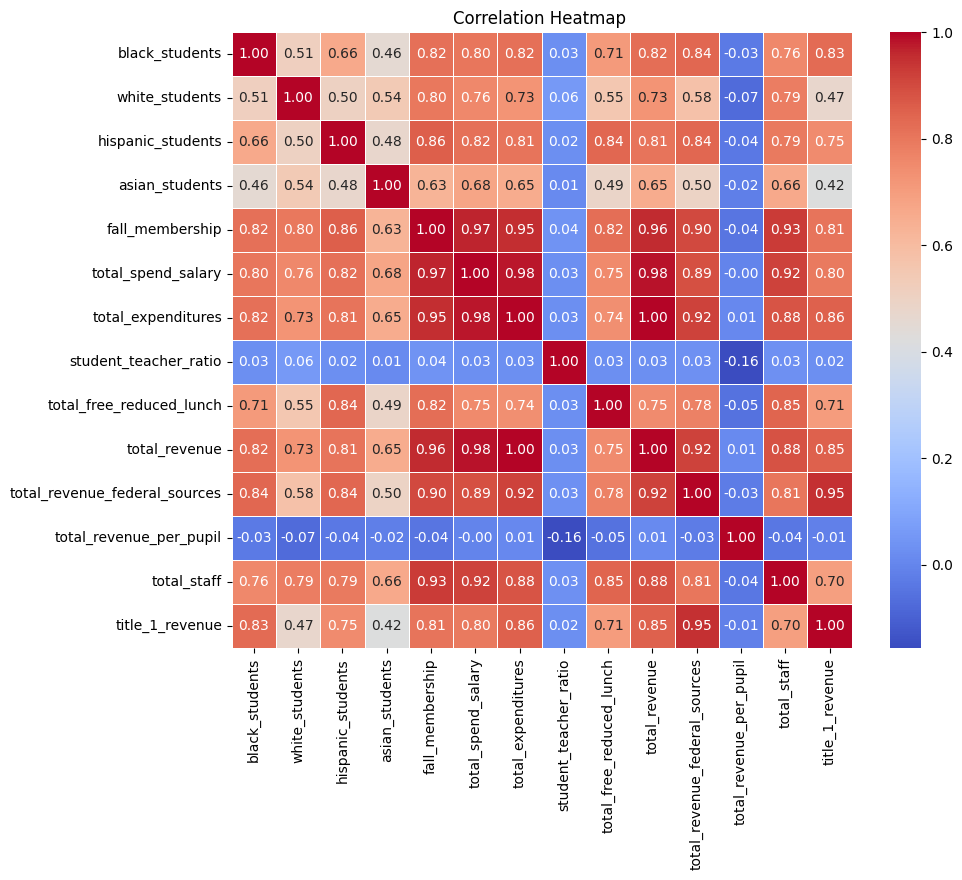

In [34]:
columns_of_interest = ['black_students', 'white_students', 
                       'hispanic_students', 'asian_students', 'fall_membership', 'total_spend_salary', 
                       'total_expenditures', 'student_teacher_ratio','total_free_reduced_lunch','total_revenue', 'total_revenue_federal_sources', 'total_revenue_per_pupil', 'total_staff', 'title_1_revenue']

# Select only the columns of interest
correlation_matrix_subset = pub_school_fiscal_updated[columns_of_interest].corr()

# Plot the heatmap for the subset of columns
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap ')
plt.show()

EXPLAIN CORRELATION MAP

In [35]:
# Calculating the percentage of each racial group 
pub_school_fiscal_updated['black_student_percentage'] = (pub_school_fiscal_updated['black_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['white_student_percentage'] = (pub_school_fiscal_updated['white_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['hispanic_student_percentage'] = (pub_school_fiscal_updated['hispanic_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['asian_student_percentage'] = (pub_school_fiscal_updated['asian_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['american_indian_student_percentage'] = (pub_school_fiscal_updated['american_indian_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['hawaiian_student_percentage'] = (pub_school_fiscal_updated['hawaiian_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['two_or_more_races_student_percentage'] = (pub_school_fiscal_updated['two_or_more_races_students'] / pub_school_fiscal_updated['fall_membership']) * 100

pub_school_fiscal_updated[['black_student_percentage', 'white_student_percentage', 'hispanic_student_percentage', 
                                 'asian_student_percentage', 'american_indian_student_percentage', 'hawaiian_student_percentage',
                                 'two_or_more_races_student_percentage']].head()


,black_student_percentage,white_student_percentage,hispanic_student_percentage,asian_student_percentage,american_indian_student_percentage,hawaiian_student_percentage,two_or_more_races_student_percentage
0,3.691621,40.556319,52.266484,0.429258,0.291896,0.017170,2.747253
1,1.197085,71.304650,25.138793,0.468425,0.555170,0.086745,1.249133
2,23.860323,55.202333,8.633810,6.791836,0.056895,0.007112,5.447692
3,18.777255,59.991449,6.831979,8.619068,0.641300,0.230868,4.908080
5,22.447013,61.030829,14.354528,0.722543,0.192678,0.048170,1.204239


In [36]:
pub_school_fiscal_updated.head()

,LEAID,total_poverty_estimate,school_count,total_title_1_yes,total_title_1_no,total_students_frl,total_free_reduced_lunch,agency_name,state_name,fall_membership,total_revenue,total_revenue_local_sources,total_revenue_state_sources,total_revenue_federal_sources,total_expenditures_el_sec_education,total_expenditures,total_revenue_per_pupil,total_revenue_local_sources_per_pupil,total_revenue_state_sources_per_pupil,total_revenue_federal_sources_per_pupil,long_term_debt_outstanding,CSA_ID,total_students,american_indian_students,asian_students,hispanic_students,black_students,white_students,hawaiian_students,two_or_more_races_students,total_race_ethnicity,fte_teachers,student_teacher_ratio,total_staff,total_spend_salary,total_spend_salary_per_pupil,total_spend_instruction_per_pupil,total_spend_benefits_per_pupil,long_term_debt,title_1_revenue,instruction_spend_total,salary_instruction_spend,black_student_percentage,white_student_percentage,hispanic_student_percentage,asian_student_percentage,american_indian_student_percentage,hawaiian_student_percentage,two_or_more_races_student_percentage
0,100005,247.166667,6,6,0,2118.0,2118.0,ALBERTVILLE CITY,Alabama,5824,63333000,15607000,40121000,7605000,50454000,54630000,10874,2680,6889,1306,28259000,,5824,17,25,3044,215,2362,1,160,5824,301,19,463,27371000,4700,5132,1856,0,1775000,29888000,17765000,3.691621,40.556319,52.266484,0.429258,0.291896,0.017170,2.747253
1,100006,253.333333,15,12,3,2888.0,2613.0,MARSHALL COUNTY,Alabama,5764,66333000,14943000,42131000,9259000,61190000,65302000,11508,2592,7309,1606,24233000,,5764,32,27,1449,69,4110,5,72,5764,294,19,562,33442000,5802,5915,2314,1980000,2594000,34095000,20386000,1.197085,71.304650,25.138793,0.468425,0.555170,0.086745,1.249133
2,100007,481.888889,18,6,12,3277.0,2633.0,HOOVER CITY,Alabama,14061,196210000,104603000,82689000,8918000,161809000,181862000,13954,7439,5881,634,163320000,142,14061,8,955,1214,3355,7762,1,766,14061,970,14,1541,97962000,6967,7229,2684,108630000,1047000,101645000,65958000,23.860323,55.202333,8.633810,6.791836,0.056895,0.007112,5.447692
3,100008,457.181818,11,4,7,1270.0,1121.0,MADISON CITY,Alabama,11695,139137000,54788000,77294000,7055000,114802000,145036000,11897,4685,6609,603,48263000,290,11695,75,1008,799,2196,7016,27,574,11695,665,17,1135,68070000,5820,6014,2225,93410000,773000,70337000,45950000,18.777255,59.991449,6.831979,8.619068,0.641300,0.230868,4.908080
5,100011,249.750000,4,3,1,792.0,748.0,LEEDS CITY,Alabama,2076,25777000,9712000,13591000,2474000,20534000,23732000,12417,4678,6547,1192,9931000,142,2076,4,15,298,466,1267,1,25,2076,109,18,185,11776000,5672,5562,2137,0,379000,11546000,7744000,22.447013,61.030829,14.354528,0.722543,0.192678,0.048170,1.204239


In [37]:
nan_black_percentage = pub_school_fiscal_updated['black_student_percentage'].eq(0).sum()
nan_black_percentage

#1,629 districts have a 0 percent of black students

np.int64(1629)

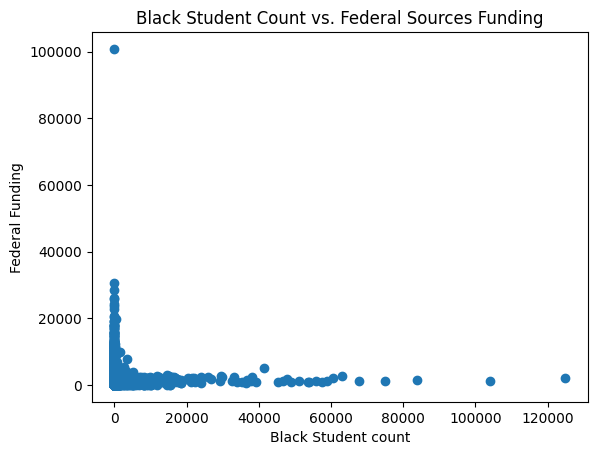

In [38]:
plt.scatter(pub_school_fiscal_updated['black_students'], pub_school_fiscal_updated['total_revenue_federal_sources_per_pupil'])
plt.title('Black Student Count vs. Federal Sources Funding')
plt.xlabel('Black Student count')
plt.ylabel('Federal Funding')
plt.show()

This grpah shows a very slight decrease in title 1 funding as the count Black students increase in each district 

In [39]:
pub_school_fiscal_updated= pub_school_fiscal_updated.dropna(subset=['black_students','total_revenue_federal_sources'])

corr_blk_title1= pub_school_fiscal_updated['black_students'].corr(pub_school_fiscal_updated['title_1_revenue'])

corr_blk_title1 

np.float64(0.8317890944054807)

The correlation of .83 is showing a positve realtionship between the amount of black students and how much federal funding they get.

In [40]:
pub_school_fiscal_updated['black_students'].describe()

count     14925.000000
mean        482.478392
std        2921.376558
min           0.000000
25%           3.000000
50%          19.000000
75%         166.000000
max      124924.000000
Name: black_students, dtype: float64

In [41]:
pub_school_fiscal_updated.to_csv("/Users/remi/Documents/Masters Fall 2024/Masters Spring 2025/Public School Charachtertics/updated_public_fiscala.csv", index=False)

# Feature engineering

In [42]:
#Combining Black and Hispanic students 
pub_school_fiscal_updated['black_hispanic_students'] = pub_school_fiscal_updated['black_students'] + pub_school_fiscal_updated['hispanic_students']


Creating a log of title_1_revenue 

In [43]:
pub_school_fiscal_updated['log_title_1_revenue'] = np.log1p(pub_school_fiscal_updated['title_1_revenue'])


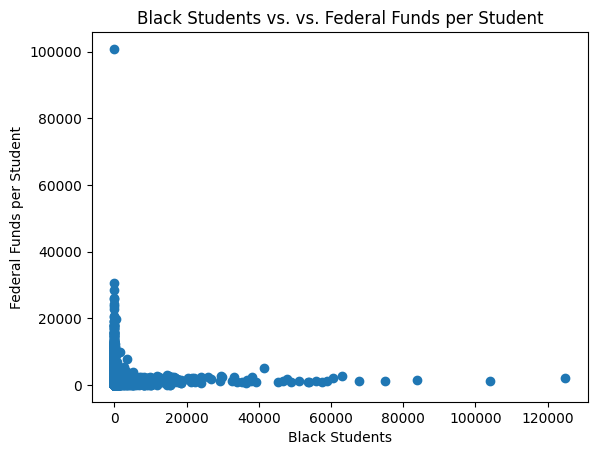

In [44]:
plt.scatter(pub_school_fiscal_updated['black_students'], pub_school_fiscal_updated['total_revenue_federal_sources_per_pupil'])
plt.title('Black Students vs. vs. Federal Funds per Student')
plt.xlabel('Black Students')
plt.ylabel('Federal Funds per Student')
plt.show()

This graph is showing the relationship between the amount of black students and the amount of federal funding is allocated per student. This grpah is highly skewed right,where most schools are relativly low federal funding per students. This graph is showing that a majority of black students recive a modest amount of funding, a small number of districts recieve disporpotinally high amounts of federal funding per student. 

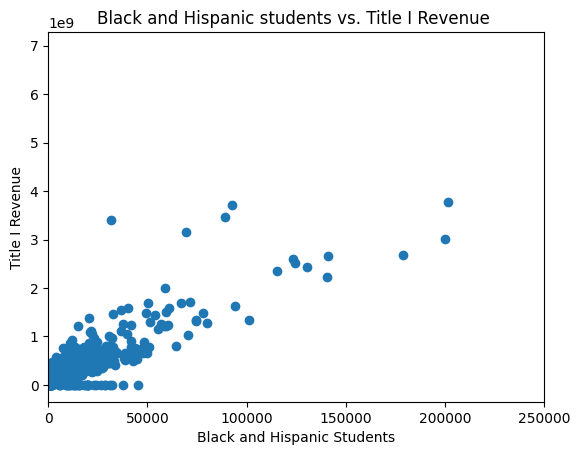

In [45]:
plt.scatter(pub_school_fiscal_updated['black_hispanic_students'], pub_school_fiscal_updated['total_revenue'])


plt.xlim(0,250000)
plt.title('Black and Hispanic students vs. Title I Revenue ')
plt.xlabel('Black and Hispanic Students')
plt.ylabel('Title I Revenue')
plt.show()

This graph is showing the relationship between Black and Hispanic students and how much Ttile I funding their distict recieves. It is showing a postive relationship between the number od Black and Hispanic students and the the Title I revenue that is recieved. As the number of Black and hispanic students increases, the Title I revenue also seems to increase, which is suggesting that districts with larger populations of black and brown students tend to recieve more federal funding through Title I. However, there are a few outliers with extremely high funding.


In [46]:
# Calculating the percentage of each racial group 
pub_school_fiscal_updated['black_student_percentage'] = (pub_school_fiscal_updated['black_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['white_student_percentage'] = (pub_school_fiscal_updated['white_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['hispanic_student_percentage'] = (pub_school_fiscal_updated['hispanic_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['asian_student_percentage'] = (pub_school_fiscal_updated['asian_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['american_indian_student_percentage'] = (pub_school_fiscal_updated['american_indian_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['hawaiian_student_percentage'] = (pub_school_fiscal_updated['hawaiian_students'] / pub_school_fiscal_updated['fall_membership']) * 100
pub_school_fiscal_updated['two_or_more_races_student_percentage'] = (pub_school_fiscal_updated['two_or_more_races_students'] / pub_school_fiscal_updated['fall_membership']) * 100

pub_school_fiscal_updated[['black_student_percentage', 'white_student_percentage', 'hispanic_student_percentage', 
                                 'asian_student_percentage', 'american_indian_student_percentage', 'hawaiian_student_percentage',
                                 'two_or_more_races_student_percentage']].head()


,black_student_percentage,white_student_percentage,hispanic_student_percentage,asian_student_percentage,american_indian_student_percentage,hawaiian_student_percentage,two_or_more_races_student_percentage
0,3.691621,40.556319,52.266484,0.429258,0.291896,0.017170,2.747253
1,1.197085,71.304650,25.138793,0.468425,0.555170,0.086745,1.249133
2,23.860323,55.202333,8.633810,6.791836,0.056895,0.007112,5.447692
3,18.777255,59.991449,6.831979,8.619068,0.641300,0.230868,4.908080
5,22.447013,61.030829,14.354528,0.722543,0.192678,0.048170,1.204239


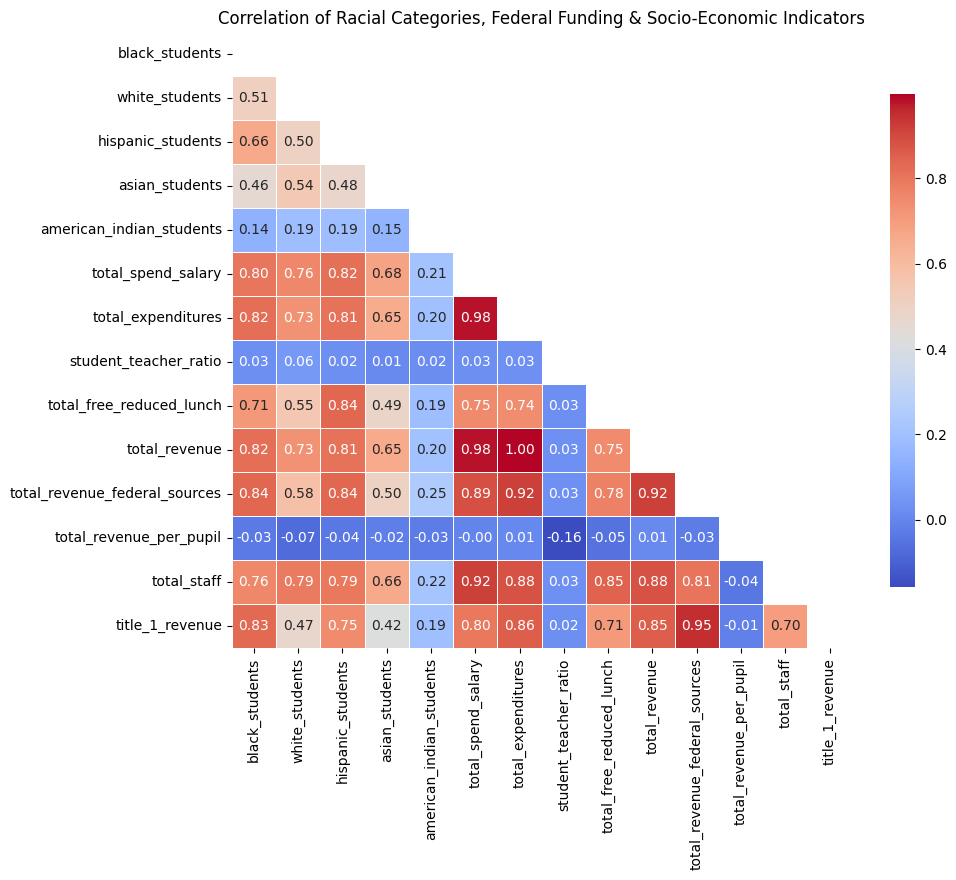

In [47]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

# Columns I want to see:
student_columns = ['black_students', 'white_students', 'hispanic_students', 
                   'asian_students', 'american_indian_students', 'total_spend_salary', 
                   'total_expenditures', 'student_teacher_ratio', 'total_free_reduced_lunch',
                   'total_revenue', 'total_revenue_federal_sources', 'total_revenue_per_pupil', 
                   'total_staff', 'title_1_revenue']

correlation_matrix = pub_school_fiscal_updated[student_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=mask, 
           cbar_kws={'shrink': 0.8})  # this adds color bar
plt.title("Correlation of Racial Categories, Federal Funding & Socio-Economic Indicators")
plt.show()



The correlation matrix shows that schools with higher percentages of Black and Hispanic students tend to have higher federal funding, though the correlation is negative with other funding-related variables like salary expenditures. The variables like student-teacher ratios show weak correlations with funding, indicating they have less impact on financial resources.

The correlation matrix reveals that Title 1 funding is higher in schools with larger populations of Black and Hispanic students compared to those with higher percentages of White and Asian students. This suggests that schools with more Black and Hispanic students receive more federal resources through Title 1



Next Steps: 

- go more indepth with the analysis of Title 1 funding, f, particularly for Black and Hispanic students, by comparing schools with varying levels of funding.

- see if location has to do with how much federal funding black/brown schools recieve

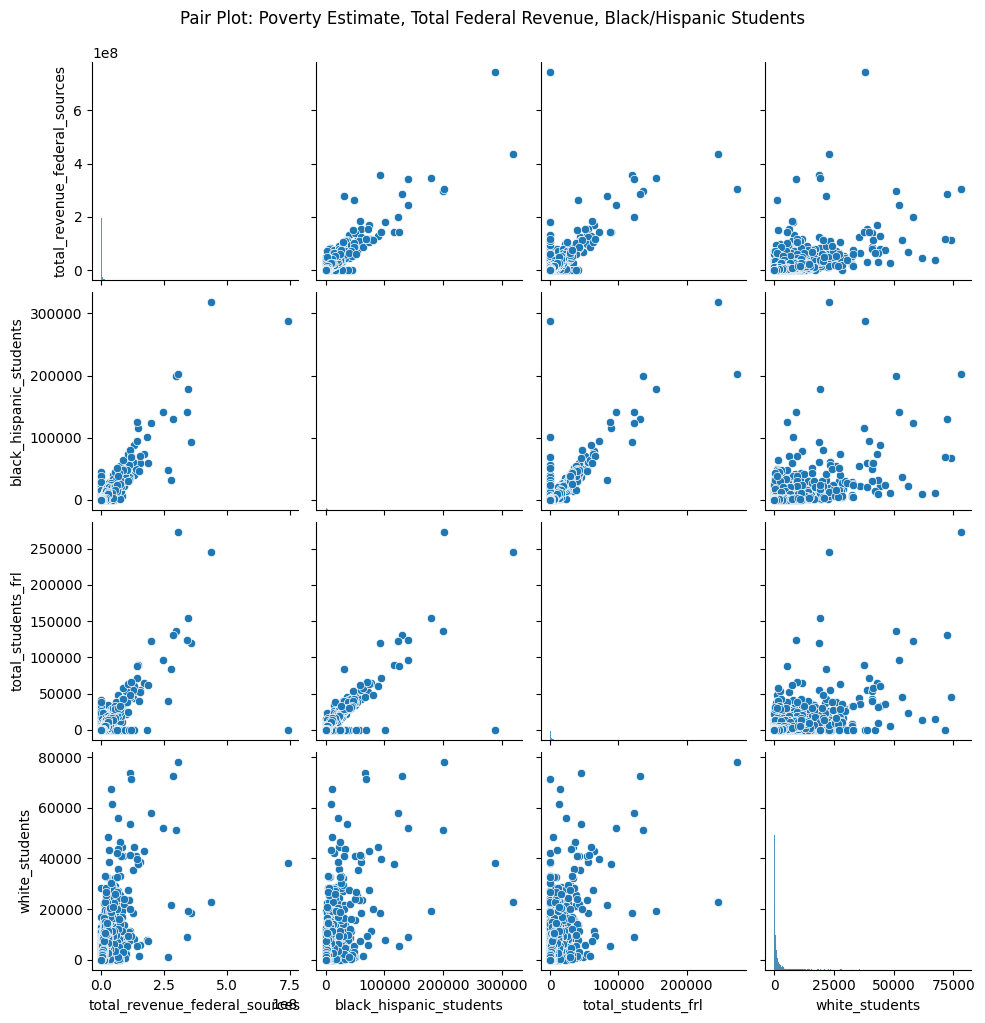

In [48]:
# Subset of the data with the variables of interest
variables_of_interest = [ 'total_revenue_federal_sources', 'black_hispanic_students', 'total_students_frl', 'white_students']
# Create the pair plot for the selected variables
sn.pairplot(pub_school_fiscal_updated[variables_of_interest])

# Add title
plt.suptitle('Pair Plot: Poverty Estimate, Total Federal Revenue, Black/Hispanic Students', y=1.02)

# Show the plot
plt.show()

- The amount of students on frl show a more clear postive relationship between black and hispanic students than white students. 
    - The same is with the total federal funding 

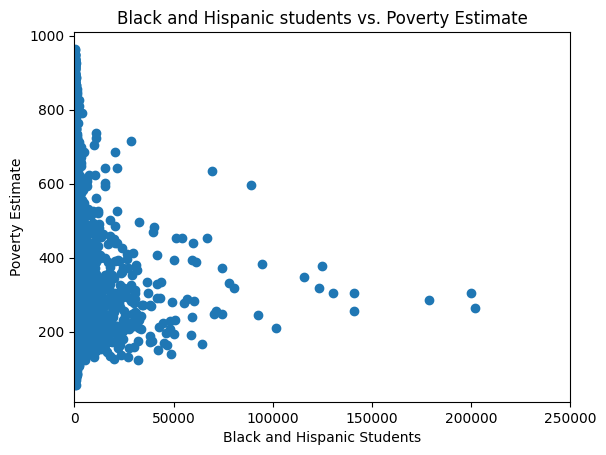

In [49]:
plt.scatter(pub_school_fiscal_updated['black_hispanic_students'], pub_school_fiscal_updated['total_poverty_estimate'])


plt.xlim(0,250000)
plt.title('Black and Hispanic students vs. Poverty Estimate')
plt.xlabel('Black and Hispanic Students')
plt.ylabel('Poverty Estimate')
plt.show()

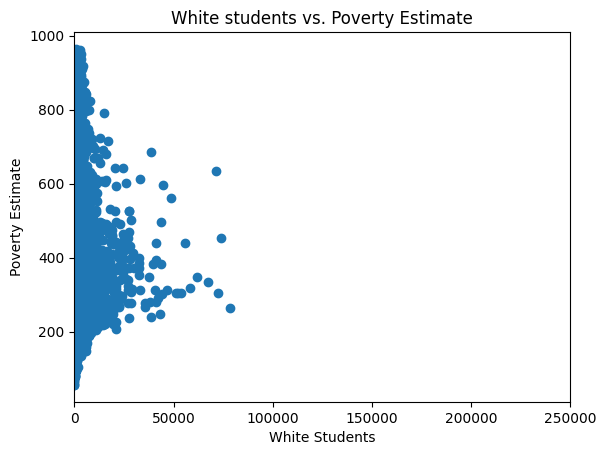

In [50]:
plt.scatter(pub_school_fiscal_updated['white_students'], pub_school_fiscal_updated['total_poverty_estimate'])


plt.xlim(0,250000)
plt.title('White students vs. Poverty Estimate')
plt.xlabel('White Students')
plt.ylabel('Poverty Estimate')
plt.show()

Most districts in both cases (black/hispanic and white) have relatively low poverty estimates, but some outlier schools have very high poverty estimates, leading to the rightward lean. Black and hispanic students do have more variation in their poverty esimate, with higher outliers.

In [53]:
pub_school_fiscal_updated_0= pub_school_fiscal_updated[pub_school_fiscal_updated['total_revenue'] > 0]

# Calculate the proportion of Title I revenue to total federal revenue for each district-- and for frl, federal funding in total, and blk/hs students.
pub_school_fiscal_updated_0['federal_proportion'] = pub_school_fiscal_updated_0['total_revenue_federal_sources'] / pub_school_fiscal_updated_0['total_revenue']
pub_school_fiscal_updated_0['frl_proportion'] = pub_school_fiscal_updated_0['total_students_frl'] / pub_school_fiscal_updated_0['fall_membership']
pub_school_fiscal_updated_0['title1_proportion'] = pub_school_fiscal_updated_0['title_1_revenue'] / pub_school_fiscal_updated_0['total_revenue_federal_sources']
pub_school_fiscal_updated_0['blk_hs_prop'] = pub_school_fiscal_updated_0['black_hispanic_students'] / pub_school_fiscal_updated_0['fall_membership']



# Display the first few rows to check the new column
pub_school_fiscal_updated_0[['title_1_revenue','total_revenue', 'total_revenue_federal_sources', 'title1_proportion', 'frl_proportion', 'state_name','federal_proportion','blk_hs_prop', 'black_hispanic_students','fall_membership']].tail(60)

,title_1_revenue,total_revenue,total_revenue_federal_sources,title1_proportion,frl_proportion,state_name,federal_proportion,blk_hs_prop,black_hispanic_students,fall_membership
18171,108000,9183000,545000,0.198165,0.431973,Wisconsin,0.059349,0.110544,65,588
18172,83000,12358000,363000,0.228650,0.168044,Wisconsin,0.029374,0.112948,82,726
18173,101000,21387000,488000,0.206967,0.039837,Wisconsin,0.022818,0.075587,74,979
18174,46000,23150000,793000,0.058008,0.194429,Wisconsin,0.034255,0.034679,61,1759
18175,133000,4908000,459000,0.289760,0.577689,Wisconsin,0.093521,0.035857,9,251
18176,338000,45401000,1516000,0.222955,0.549240,Wisconsin,0.033391,0.214406,381,1777
18177,921000,77324000,4780000,0.192678,0.493545,Wisconsin,0.061818,0.074335,380,5112
18178,268000,16533000,877000,0.305587,0.431065,Wisconsin,0.053045,0.066318,76,1146
18179,102000,6193000,430000,0.237209,0.559880,Wisconsin,0.069433,0.026946,9,334
18180,66000,8586000,410000,0.160976,0.467308,Wisconsin,0.047752,0.036538,19,520


In [54]:

# Calculating a new feature combining poverty estimate and Title I funding
pub_school_fiscal_updated['poverty_title_1_combined'] = (
    pub_school_fiscal_updated['black_hispanic_students'] * pub_school_fiscal_updated['total_poverty_estimate'] * pub_school_fiscal_updated['title_1_revenue'] 
)



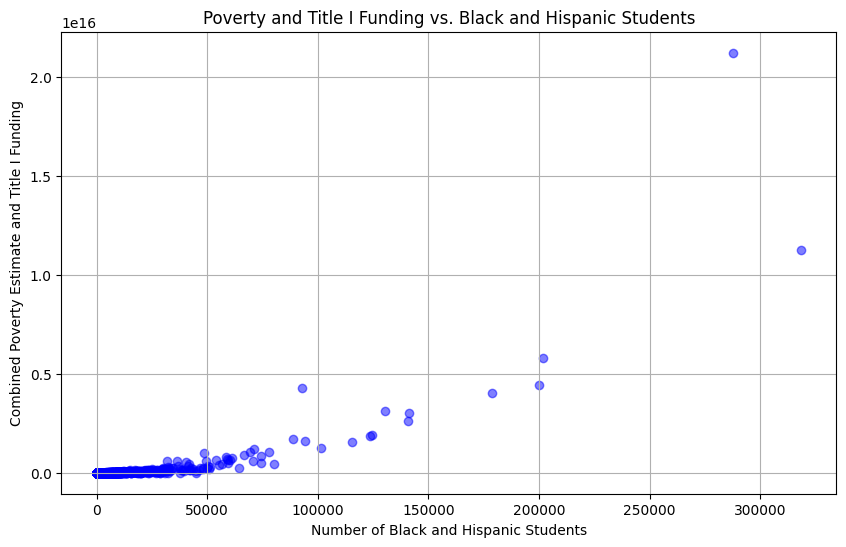

In [55]:
# Scatter plot combining poverty estimate anf title 1 funding vs. number of Black and Hispanic students
plt.figure(figsize=(10, 6))
plt.scatter(pub_school_fiscal_updated['black_hispanic_students'], pub_school_fiscal_updated['poverty_title_1_combined'], color='blue', alpha=0.5)
plt.title('Poverty and Title I Funding vs. Black and Hispanic Students')
plt.xlabel('Number of Black and Hispanic Students')
plt.ylabel('Combined Poverty Estimate and Title I Funding')
plt.grid(True)
plt.show()

This plot is showing the relationship between the number of Black and hispanic students and the combined poverty estimate and title 1 funding. Most of the data is at the bottom left which and mean most of the schools with Black and Hispanic students have a low comined poverty esitmate and title I funding. There are few data point that staggerly rise to the far right, which shows higher values in both the black and hispanic students and combined poverty estimate and Title I funding. However, this may be due to a higher number of students in a distirct which could also raise the amount of finding and poverty estimate.

QUESTION: Should I get rid of extremly large districts to try and noramlize my dataset, or will that alther the integrity of my study?

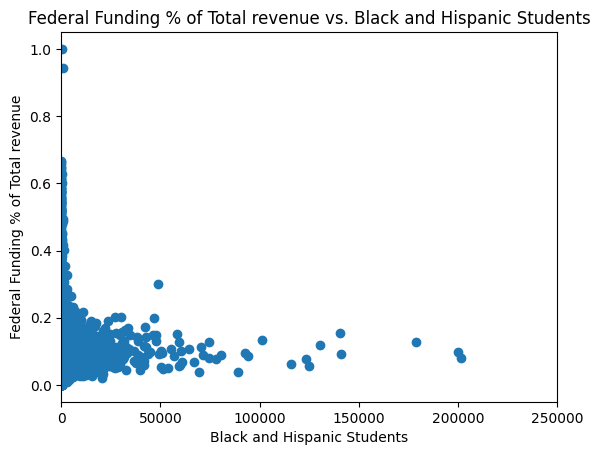

In [ ]:
plt.scatter(pub_school_fiscal_updated_0['black_hispanic_students'], pub_school_fiscal_updated_0['federal_proportion'])


plt.xlim(0,250000)
plt.title('Federal Funding % of Total revenue vs. Black and Hispanic Students')
plt.xlabel('Black and Hispanic Students')
plt.ylabel('Federal Funding % of Total revenue')
plt.show()

This plot is showing the relationship between the number of Blakck and hispanic students and the percentage of federal funding as a percentage of the total revenue. The plot is showing that schools with more Black and hispanic students tend to recive a lower percentage of federal funding compared to the total funding. 


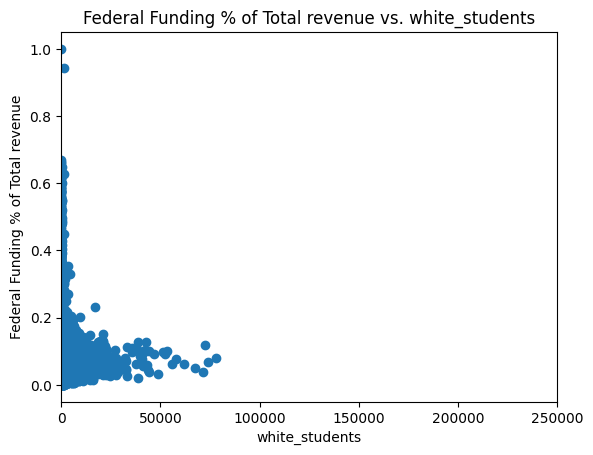

In [ ]:
plt.scatter(pub_school_fiscal_updated_0['white_students'], pub_school_fiscal_updated_0['federal_proportion'])


plt.xlim(0,250000)
plt.title('Federal Funding % of Total revenue vs. white_students')
plt.xlabel('white_students')
plt.ylabel('Federal Funding % of Total revenue')
plt.show()

This plot is showing the relationship between the number of white students and the percentage of federal funding as a percentage of the total revenue. This plots shows a similar relationship.

Looking at these two plots, I am thinking the extremly large schools tend to be more full of Black and Hispanic students which may suggest overcrowding and not enough resources.It also shows that schools with more white students tend to receive a lower percentage of federal funding, but there is a slightly higher proportion of funding for some schools compared to the Black and Hispanic students, although  though most of the data points are still clustered at the lower end of funding percentages.

Next steps:

- Find a way to properly scale and noramlize my data to avoid the skewed results I have been getting 



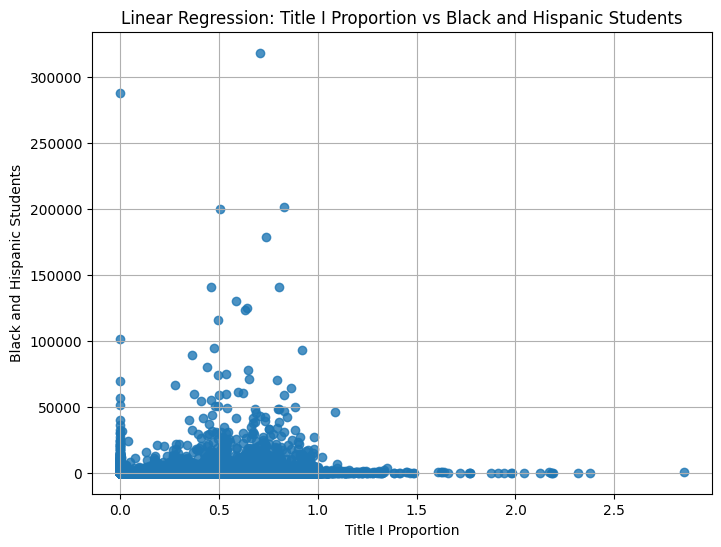

MissingDataError: exog contains inf or nans

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Droping any nan values

df_reg = pub_school_fiscal_updated_0[['frl_proportion', 'black_hispanic_students']].dropna()

plt.figure(figsize=(8, 6))
sns.regplot(x='frl_proportion', y='black_hispanic_students', data=df_reg, ci=None)
plt.xlabel('Title I Proportion')
plt.ylabel('Black and Hispanic Students')
plt.title('Linear Regression: Title I Proportion vs Black and Hispanic Students')
plt.grid(True)
plt.show()

# Regression Model details
# Adding a constant for the intercept
X = sm.add_constant(df_reg['frl_proportion'])
y = df_reg['black_hispanic_students']

model = sm.OLS(y, X).fit()
print(model.summary())
